<a href="https://colab.research.google.com/github/gavindoughtie/mlmath_class/blob/main/Calculus_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment 2: ML Gradients

* Partial Derivatives of Multivariate Functions
* The Partial-Derivative Chain Rule
* Quadratic Cost
* Gradients
* Gradient Descent
* Backpropagation
* Higher-order Partial Derivatives

## What Partial Derivatives Are

### Multivariate Functions

Even in a simple regression such as $y = mx + b$:

  $y$ is a function of *multiple* variables
  
  -- in this case, $m$ and $b$.

Therefore, we can't calculate the full derivative of $\frac{dy}{dm}$ or $\frac{dy}{db}$.

### Partial Derivatives

Enable the calculation of derivatives of multivariate equations.

Consider the equation $z = x^2 - y^2$

Hands-on demo: [https://www.geogebra.org/3d?lang=en](https://www.geogebra.org/3d?lang=en)

The partial derivative of $z$ with respect to $x$ is obtained by considering $y$ to be a constant:

<img src="https://drive.google.com/uc?id=1-60enV9kU7Gi8RuV9kpZ_HELGZDylOSc">


$z = x^2 - y^2$ Imagine $y$ is any constant, so the derivative becomes:

$\frac{\partial z}{\partial x} = 2x - 0 = 2x$ # NOTE: partial derivative symbol $\partial$ instead of full derivative $d$. (pronounced "del" instead of "dee")

In this example, the partial derivative slope of $z$ along the $x$ axis is *twice* the $x$ axis value.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import math # for constant pi

## Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$:

In [2]:
def f(my_x, my_y):
  return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$:

In [3]:
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (at $y = 0$)

In [4]:
zs_wrt_x = f(xs, 0)

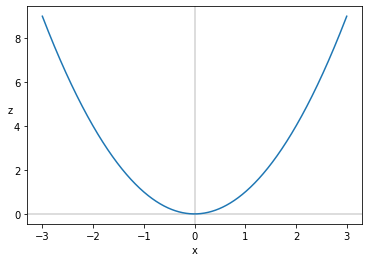

In [5]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve we can use the partial derivative from the slides:

$\frac{\partial z}{\partial x} = 2x$

In [6]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
  return 2*my_x

In [7]:
x_samples = [-2, -1, 0, 1, 2]

In [8]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [9]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col): # fprime is the partial derivative function
  my_z = my_f(my_x, my_y) # z = f(x, y)
  plt.scatter(my_x, my_z, c=col, zorder=3)

  tangent_m = fprime(my_x, my_y) # slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = my_z - tangent_m*my_x # line is z=mx+b, so b=z-mx
  tangent_line = tangent_m*my_xs + tangent_b

  plt.plot(my_xs, tangent_line, c=col,
          linestyle='dashed', linewidth=0.7, zorder=3)

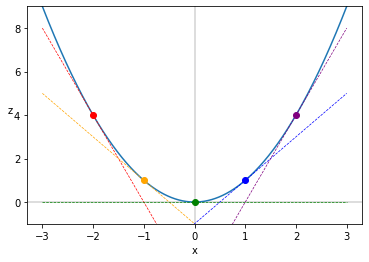

In [10]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
  point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$.

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value.

Reconsider $z = x^2 - y^2$ from the perspective of $z$ w.r.t. $y$

The partial derivative of $z$ with respect to $y$ is obtained by considering $x$ to be a constant:

<img src="https://drive.google.com/uc?id=1vKstg3iyrxJKbfeUhCpmMEcADOk5cqgu">

$z = x^2 - y^2$

$\frac{\partial z}{\partial y} = 0 -2y = -2y$

The slope of $z$ along the $y$ axis is *twice* the $y$ axis value *and is inverted* (because of the negative sign)

Now let's plot $z$ with respect to $y$ by varying $y$

In [11]:
ys = np.linspace(-3, 3, 1000)

... while holding $x$ constant ($x = 0$)

In [12]:
zs_wrt_y = f(0, ys)

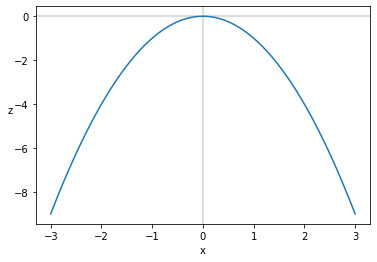

In [13]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t. $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t. $y$ is the same no matter what $x$ is:

$$
\frac{\partial z}{\partial y} = -2y
$$

So for example, holding $x$ constant at some value other than 0 increases $z$, but has no impact on the slope of $z$ w.r.t. y:

In [14]:
zs_wrt_y = f(2, ys)

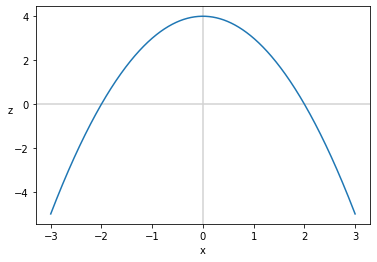

In [15]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

In [16]:
def delz_dely(my_x, my_y):
  return -2*my_y

In [17]:
y_samples = [-2, -1, 0, 1, 2]

In [18]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # fprime is the partial derivative function
  my_z = my_f(my_x, my_y) # z = f(x, y)
  plt.scatter(my_y, my_z, c=col, zorder=3)

  tangent_m = fprime(my_x, my_y) # slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = my_z - tangent_m*my_y # line is z=mx+b, so b=z-mx
  tangent_line = tangent_m*my_ys + tangent_b

  plt.plot(my_ys, tangent_line, c=col,
          linestyle='dashed', linewidth=0.7, zorder=3)

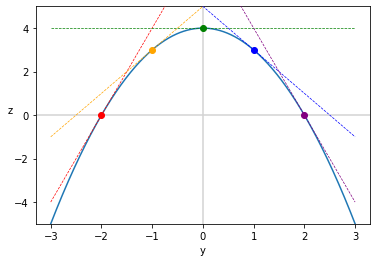

In [19]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating $\frac{\partial z}{\partial y} = -2y$.

That is, the slope of $z$ along the $y$ axis is *twice* the $y$ value and *inverted*, resulting in the parabolic curve opening downward.

### Partial Derivatives Exercieses

for $z = x^2 - y^2$ calculate:

* The value of $z$
* The slope of $z$ with respect to $x$
* And the slope of $z$ with respect to $y$

At the points where:

1. $x = 3$, $y = 0$
2. $x = 2$, $y = 3$
3. $x = -2$, $y = -3$

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation libary to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point ($x$, $y$, $z$):

### Solutions for

$$z = x^2 - y^2$$ 

1. **where $x = 3$, $y = 0$**

value: $z = 3^2 - 0 = 9$

$\frac{\partial z}{\partial x} = 2(3) - 0 = 6 - 0 = 6$

$\frac{\partial z}{\partial y} = 0 - 0 = 0$

2. **where $x = 2$, $y = 3$**

value: $z = 2^2 - 3^2 = 4 -9 = -5$

$\frac{\partial z}{\partial x} = 2(2) - 0 = 4 - 0 = 4$

$\frac{\partial z}{\partial y} = 0 - 2(3) = -6$

3. $x = -2$, $y = -3$

value: $z = -2^2 - -3^2 = 4 - 9 = -5$

$\frac{\partial z}{\partial x} = 2(-2) - 0 = -4$

$\frac{\partial z}{\partial y} = 0 - 2(-3) = 0 - -6 = 6$


## Calculating Partial Derivatives with Autodiff

Determining partial derivatives by hand is helpful for understanding, but in practice autodiff is the way to go. Here's the PyTorch code:

In [20]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [21]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [22]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [23]:
z.backward() # Autodiff

As we already knew from our exercises above, the slope of the point (0,0,0) is zero with respect to both the $x$ and $y$ axes:

In [24]:
x.grad

tensor(0.)

In [25]:
y.grad

tensor(-0.)

In [26]:
# Repeat of the exercises above

values = [(3., 0.), (2.0,3.), (-2., -3.)]

for x_val, y_val in values:
  x = torch.tensor(x_val).requires_grad_()
  y = torch.tensor(y_val).requires_grad_()
  z = f(x, y)
  z.backward()
  print(f'x = {x}, y = {y}')
  print(f' z = {z}')
  print(f' xgrad: {x.grad}')
  print(f' ygrad: {y.grad}')

  

x = 3.0, y = 0.0
 z = 9.0
 xgrad: 6.0
 ygrad: -0.0
x = 2.0, y = 3.0
 z = -5.0
 xgrad: 4.0
 ygrad: -6.0
x = -2.0, y = -3.0
 z = -5.0
 xgrad: -4.0
 ygrad: 6.0


## Advanced Partial Derivatives

Multivariate function for volume of a cylinder:

$v = \pi r^2l$

$\frac{\partial v}{\partial l} = \pi r^2 \frac{d}{dl}(l)$  (differentiate with respect to length)

= $\pi r^2 (1)$

= $\pi r^2$

$\therefore$ a change in length $l$ corresponds to a change in *volume* by $\pi r^2$

### Partial Derivatives of a Cylinder's Volume in code

For the volume formula $v = \pi r^2l$ where $r$ is the radius of the cylinder and $l$ is its length:

In [27]:
def cylinder_vol(my_r, my_l):
  return math.pi * my_r**2 * my_l

In [28]:
# let's say the radius is 3 meters:
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [29]:
# length of 5 meters
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [30]:
# Then the volume of the cylinder is 141.4 cubic meters:
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [31]:
v.backward()

In [32]:
l.grad

tensor(28.2743)

As we derived above:

$$
\frac{\delta v}{\delta l} = \pi r^2
$$

In [33]:
math.pi * 3**2

28.274333882308138

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of $28.27m^3$. We can prove this to ourselves:

In [34]:
cylinder_vol(3, 6)

169.64600329384882

In [35]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [36]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

...and with respect to $r$:

$\frac{\partial v}{\partial r} = \pi \frac{d}{dr}(r^2)l$

= $\pi(2r)l$

= $2\pi r l$

$\therefore$ a change in radius $r$ (by an infinitesimally small amount) corresponds to a change in *volume* by $2\pi r l$

In [37]:
2 * math.pi * r * l

tensor(94.2478, grad_fn=<MulBackward0>)

In [38]:
r.grad

tensor(94.2478)

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $Δ r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 × 10^{-6}$

In [39]:
delta = 1e-6
delta

1e-06

In [40]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta # Dividing by delta restores scale

94.24779531741478

### Advanced Partial Derivative Exercises

Find all the partial derivatives of the following functions:

1. $z = y^3 + 5xy$
2. The surface area of a cylinder: $a = 2\pi r^2 + 2 \pi rh$
3. The volume of a *square prism* with a *cube* cut out of its center is described by $v = x^2y - z^3$

### 1. $z = y^3 + 5xy$

The bit I now understand is that when doing the partial derivatives, the *entire* variable expression becomes the "constant" so $5x$ is constant as is $5y$ and you differentiate on the other part of the expression.

$\frac{\partial z}{\partial y} = 3y^2 + 5x(1) = 3y^2 + 5x$

$\frac{\partial z}{\partial x} = 0 + 5y(1) = 5y$

### 2. The surface area of a cylinder: $a = 2\pi r^2 + 2 \pi rh$

* variables are $r$ and $h$

$\frac{\partial a}{\partial h} = 0 + 2 \pi r (1) = 2 \pi r$
* No $h$ in first term, so the entire term is a constant, so its derivative is 0
* second term follows the power rule for $1h^0 = 1$ and remember $2 \pi r$ is a constant

$\frac{\partial a}{\partial r} = 2 \pi(2r) + 2 \pi h(1) = 4 \pi r + 2 \pi r(1) = 4 \pi r + 2 \pi h$
* Differentiate the first term normally for $r$, $2\pi$ is treated like a constant!
* r is the variable that gets differentiated in the second term, so it's $r^1 = 1r^0 = 1$.

### 3. The volume of a *square prism* with a *cube* cut out of its center is described by
### $v = x^2y - z^3$

$\frac{\partial v}{\partial x} = 2xy - 0 = 2xy$

$\frac{\partial v}{\partial y} = x^2 \cdot 1 - 0 = x^2$

$\frac{\partial v}{\partial z} 2x \cdot 0 - 3z^2 = -3z^2$


### Partial Derivative Notation

$$
z = f(x, y)
$$

$$
\frac{\partial z}{\partial x}
$$

OR

$$
 \frac{\partial f}{\partial x}
 $$
 
 OR
 
 $$
  f_x
  $$
  OR
  
  $$
   D_xf
$$

### The Chain Rule for Partial Derivatives

Let's say $y = f(u)$ and $u = g(x)$

Recall that the chain rule for full derivatives would be:

$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}
$$

With univariate functions, the partial derivative is identical:

$$
\frac{dy}{dx} = \frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x}
$$

With a multivariate function, the partial derivative is more interesting:

$y = f(u)$ and $u = g(x, z)$

So you could think of $u$ having inputs $x$ and $z$ and thus differentiate for each:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} \ \ \ \ \ \ \ 
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial z}
$$

With multiple multivariate functions, it gets really interesting:

$y = f(u, v)$

$u = g(x, z)$ 

$v = h(x, z)$

Again, imagine a single tree, so derivatives are:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} + 
\frac{\partial y}{\partial v} \frac{\partial v}{\partial x}
$$

$$
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial z} + 
\frac{\partial y}{\partial v} \frac{\partial v}{\partial z}
$$

In other words, you can sum the partial derivative chain of each term.

Generalizing completely:

$y = f(u_1, u_2, \dots, u_m)$

$u_j = g(x_1, x_2, \dots, x_n)$

for $i = 1,2,\dots,n$:

$$
\frac{\partial y}{\partial x_i} = 
\frac{\partial y}{\partial u_1}
\frac{\partial u_1}{\partial x_i} + 
\frac{\partial y}{\partial u_2}
\frac{\partial u_2}{\partial x_i} + \dots +
\frac{\partial y}{\partial u_m}
\frac{\partial u_m}{\partial x_i}
$$

### Multivariate Chain Rule Exercises

Find all the partial derivatives of $y$, where:

1. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(z)$
2. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(x, z)$
3. $y = f(u, v, w) \ \ \ u = g(x) \ \ \ v = h(x) \ \ \ w = j(x)$


### 1. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(z)$

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x}
$$

$$
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial v} \frac{\partial v}{\partial z} 
$$


### 2. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(x, z)$

Note that $x$ appears in both $u$ and $v$, but $z$ only appears in one. So the partial derivative of $x$ uses the sum of both derivatives:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} +
\frac{\partial y}{\partial v} \frac{\partial v}{\partial x} 
$$

$$
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial v} \frac{\partial v}{\partial z}
$$


### 3. $y = f(u, v, w) \ \ \ u = g(x) \ \ \ v = h(x) \ \ \ w = j(x)$

$x$ appears in all three functions, so differentiate each and sum:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} +
\frac{\partial y}{\partial v} \frac{\partial v}{\partial x}  +
\frac{\partial y}{\partial w} \frac{\partial w}{\partial x} 
$$

But note! This is also the *full derivative* $\frac{dy}{dx}$ because $y$ depends only on $x$.



## Point by Point Regression

Or, how I learned how to implement automatic differentiaton from first principles.

(a.k.a. Linear regression FTW!)

## Gradients of Cost w.r.t. Model Parameters

Here we calculate the gradient of quadratic cost with respect to a straight-line regression model's parameters. We keep the partial derivatives as simple as possible by limiting the model to handling a single data point.

In [41]:
import torch

In [42]:
# Same data as regression in pytorch and the moore-penrose pseudoinverse
# (supposedly mls of an Alzheimer's drug)
xs = torch.tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [43]:
# Fictional "forgetfulness" score of patients
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The slope of a line is still $y = mx + b$:


In [44]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + b

Initialize $m$ and $b$ with the same "random" near-zero values as in our regression notebook:

In [45]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

To keep the partial derivatives as simple as possible, let's move forward with a single instance $i$ from the eight possible data points:

In [46]:
i = 7
x = xs[i]
y = ys[i]

In [47]:
x

tensor(7.)

In [48]:
y

tensor(-1.3700)

**Step 1**: Forward pass

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [49]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost **$C$**.

In the previous regressiion notebook, we used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by:

$$
C = (\hat{y} - y)^2
$$

In [50]:
def squared_error(my_yhat, my_y):
  return (my_yhat - my_y)**2

In [51]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [52]:
C.backward()

The partial derivative of $C$ with respect to $m \left( \frac{\partial C}{\partial m} \right)$ is:

In [53]:
m.grad

tensor([108.7800])

and the partial derivative of $C$ with respect to $m \left( \frac{\partial C}{\partial b} \right)$ is:

In [54]:
b.grad

tensor([15.5400])

### Deriving the partial derivatives of quadratic cost by hand

$
C = (\hat{y} - y)^2
$

is actually two nested functions:

$C = u^2$

$u = \hat{y} - y$

starting with the inner function:

$
\frac{\partial u}{\partial \hat{y}} = 1({\hat{y}}\ \ ^0) - 0 = 1 - 0 = 1
$

Note that we don't really care about $y$ as it's just a data point. What matters is cost with respect to the input parameters $m$ and $b$ which is what produce the value $\hat{y}$.

Then the outer:

$
\frac{dC}{du} = \frac{\partial C}{\partial u} = 2u = 2(\hat{y} - y)
$

Then chain together:

$
\frac{\partial C}{\partial \hat{y}} = \frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y}} =
(2(\hat{y} - y))(1) = 2(\hat{y} -y)
$

### Predicted $y$ w.r.t. Model Parameters

$\hat{y} = mx + b$

$\frac{\partial \hat{y}}{\partial b} = 1(0x^0) + 1b^0 = 0 + 1 = 1$

$\frac{\partial \hat{y}}{\partial m} = 1(x) + 0 = x$ (power rule on $m$ is 1)

Putting all these partial derivatives together with the chain rule:

$
\frac{\partial C}{\partial \hat{y}} = 2(\hat{y} -y)
\ \ \ \
\frac{\partial \hat{y}}{\partial m} = x
\ \ \ \
\frac{\partial \hat{y}}{\partial b} = 1
$

with respect to $m$:

$
\frac{\partial C}{\partial m} = 
\frac{\partial C}{\partial \hat{y}}
\frac{\partial \hat{y}}{\partial m} =
(2(\hat{y} -y))x = 2x(\hat{y} - y)
$

with respect to $b$:

$
\frac{\partial C}{\partial b} = 
\frac{\partial C}{\partial \hat{y}}
\frac{\partial \hat{y}}{\partial b} = (2\hat{y} -y)1 = 2(\hat{y} -y)
$

In [55]:
2 * x * (yhat.item() - y) # partial derivative of cost with respect to m

tensor(108.7800)

In [56]:
2 * (yhat.item() - y) # partial derivative of cost with respect to b

tensor(15.5400)

## The Gradient of Cost, $\nabla C$

The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters:

$
\nabla C = \nabla_pC = \left[
  \frac{\partial C}{\partial p_1},
  \frac{\partial C}{\partial p_2},
  \dots,
  \frac{\partial C}{\partial p_n},
\right]^T
$

Note that it's transposed to be a column vector.

In this case, there are only two parameters, $b$ and $m$:

$
\nabla C = \nabla_pC = \left[
  \frac{\partial C}{\partial b},
  \frac{\partial C}{\partial m},
\right]^T
$

In [57]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

## Gradient Descent

* Calculate the gradient of mean squared error on a batch of data
* Visualize gradient descent in action

In [58]:
import torch
import matplotlib.pyplot as plt

In [59]:
# regression function, xs, ys, m and b same as above, repeated here for convenience:
# Same data as regression in pytorch and the moore-penrose pseudoinverse

# (supposedly mls of an Alzheimer's drug)
xs = torch.tensor([0., 1., 2., 3., 4., 5., 6., 7.])

# Fictional "forgetfulness" score of patients
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()


def regression(my_x, my_m, my_b):
  return my_m*my_x + b

In [60]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1**: Forward Pass

In [61]:
# Now we're working with a whole batch of data as we would be in a real model,
# so each element of yhats is our initial result for a single data point from
# xs regressed against our random m and b parameters
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

We're using mean squared error, which averages quadratic cost across multiple data points:

$$
C = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

In [62]:
def mse(my_yhat, my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return sigma / len(my_y)

In [63]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [64]:
C.backward()

In [65]:
m.grad

tensor([36.3050])

In [66]:
b.grad

tensor([6.2650])

### Deriving Cost by hand to find $\frac{\partial C}{\partial m} \ \ \frac{\partial C}{\partial b}$

Mean Squared Error:

$$
C = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

So you can decompose it to these two chain-rule obeying equations:

$$
C = \frac{1}{n} \sum_{i=1}^n{u^2}
$$

$$
u = \hat{y}_i - y_i
$$

Solving for the model parameters $m$ and $b$, which are embedded in the values calculated into $\hat{y}$.

$\frac{\partial u}{\partial \hat{y}_i} = 1 - 0 = 1$

$\frac{\partial C}{\partial u} = \frac{1}{n} \sum 2u$

= $\frac{2}{n} \sum u$

= $\frac{2}{n} \sum \left(\hat{y}_i - y_i\right)$

Now, calculate the partial derivatives for the parameters (derivation earlier in these notebooks):

$\frac{\partial \hat{y}_i}{\partial m} = X_i$

$\frac{\partial \hat{y}_i}{\partial b} = 1$

Start with $b$ because the math is a little simpler:

$$
\frac{\partial C}{\partial b} = 
\frac{\partial C}{\partial u} 
\frac{\partial u}{\partial \hat{y}_i}
\frac{\partial \hat{y}_i}{\partial b}
$$

= $
\frac{2}{n} \sum \left(\hat{y}_i - y_i \right) \cdot 1 \cdot 1 =
\frac{2}{n} \sum \left(\hat{y}_i - y_i \right)
$

Note the chain rule working on $\partial u$ and $\partial \hat{y}_i$

Trickier for $m$:

$$
\frac{\partial C}{\partial m} = 
\frac{\partial C}{\partial u} 
\frac{\partial u}{\partial \hat{y}_i}
\frac{\partial \hat{y}_i}{\partial m}
$$

= $
\frac{2}{n} \sum (\hat{y}_i - y_i)
\cdot 1
\cdot X_i
$
= $
\frac{2}{n} \sum (\hat{y}_i - y_i)
\cdot X_i
$



In [67]:
# dC/dm
2 * 1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [68]:
# dC/db
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

We don't need to explicitly create a $\nabla C$ object (Greek inverted delta is called $nabla$ for "harp" but w.r.t gradient is *del* as in "del C") for the remainder of the code in this notebook to run, but let's make it anyway and we'll use it later:

In [69]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T # alphabetically order and put into column order with T
gradient

tensor([[ 6.2650],
        [36.3050]])

Let's visualize the most pertinent metrics in a single plot:

In [70]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
  title = f'Cost = {my_C.item():.3g}'

  if include_grad:
    xlabel = f'm = {my_m.item():.3}, m grad = {my_m.grad.item():.3}'
    ylabel = f'b = {my_b.item():.3}, m grad = {my_b.grad.item():.3}'
  else:
    xlabel = f'm = {my_m.item():.3}'
    ylabel = f'b = {my_b.item():.3}'

  fig, ax = plt.subplots()

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)

  ax.scatter(my_x, my_y)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach()
  y_max = regression(x_max, my_m, my_b).detach()

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


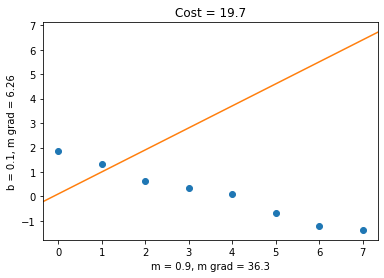

In [71]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4**: Gradient descent

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$.

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefor to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$.

In [72]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [73]:
optimizer.step() # Performs the gradient descent

In [74]:
C = mse(regression(xs, m, b), ys) # Recompute the cost after the step

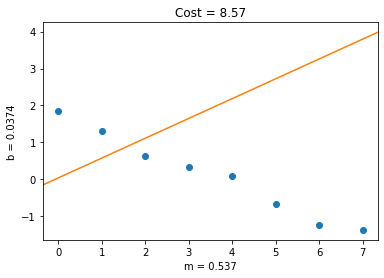

In [75]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C not yet recalculated

### Rinse and Repeat

Observe further rounds of training:

In [76]:
epochs = 1000

for epoch in range(epochs):
  optimizer.zero_grad() # reset so they don't accumulate

  yhats = regression(xs, m, b) # Step 1
  C = mse(yhats, ys) # Step 2

  C.backward() # Step 3

  #labeled_regression_plot(xs, ys, m, b, C)

  optimizer.step() # Step 4

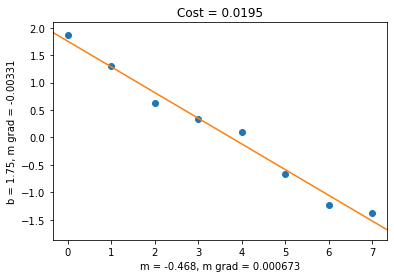

In [77]:
labeled_regression_plot(xs, ys, m, b, C)

In later rounds of training, after the model's slope $m$ has become closer to the slope represented by the data, $\frac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\frac{\partial C}{\partial m}$ remains positive.

This combination directs gradient descent to simultaneously adjust the $y$-intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data.

## Backpropagation

Chain rule of partial derivatives of *cost* w.r.t model parameters extends to deep neural networks, which may have 1000s of layers:

Training data into batches, each batch ($X$), forward pass through layers (just regression here but any multiplication/activation function), then you get $\hat{y$}$, compute the cost $C$.

Once you have $C$, calculate the partial derivative of cost for each parameter and using the chain rule, re-calculate the cost backwards through the layers, finally using gradient descent to adjust the parameters.

## Higher-order Partial Derivatives

**Regular higher-order derivatives:**

In the driving example the first derivative of distance/time is the speed, but the second derivative of speed/time is acceleration.

**Higher-order partial derivatives:**

In ML, used to accelerate through gradient descent (Optimization)

Consider the following first-order partial derivatives...

$z = x^2 + 5xy + 2y^2$

$
\frac{\partial z}{\partial x} = 2x + 5y(1) + 0 =
2x + 5y
$

$
\frac{\partial z}{\partial y} = 
0 + 5x + 4y = 5x + 4y
$

**Second-order partial derivatives**

Starting with:

$
\frac{\partial z}{\partial x} =
2x + 5y
\ \ \ \
\frac{\partial z}{\partial y} = 
5x + 4y
$

Unmixed:

Differentiate w.r.t. the same variable again:

$
\frac{\partial^2 z}{\partial x^2} =
\frac{\partial}{\partial x}(2x + 5y) =
2(1) + 0 =
2 + 0 = 2
$

$
\frac{\partial^2 z}{\partial y^2} =
\frac{\partial}{\partial y}(5x + 4y) =
0 + 4(1) = 4
$

Mixed partial derivates:

$
\frac{\partial^2 z}{\partial x \partial y} =
\frac{\partial}{\partial x}\left(\frac{dz}{dy}\right) =
\frac{\partial}{\partial x}(5x + 4y) =
5(1) + 0 = 5
$

$
\frac{\partial^2 z}{\partial y \partial x} =
\frac{\partial}{\partial y}\left(\frac{dz}{dx}\right) =
\frac{\partial}{\partial y}(2x + 5y) =
0 + 5(1) = 5
$

Notice how both mixed second-order derivatives come out to the same value?

*Clairant's (or Schwatz's or Young's) Theorem*:

Under certain (common) conditions:

$$
\frac{\partial^2 z}{\partial x \partial y} = \frac{\partial^2 z}{\partial y \partial x}
$$

But... what are those conditions?



### Higher-order Partial Derivative Notation

Given the a function like $z = f(x, y)$

Equivalent second-order (unmixed) partial derivative notations are:

$
\frac{\partial^2 z}{\partial x^2}
\ \ \ \
\frac{\partial^2 f}{\partial x^2}
\ \ \ \
f_{xx}
\ \ \ \
D_{xx}f
$

For the mixed second-order partial derivatives:

$
\frac{\partial^2 z}{\partial y \partial x}
\ \ \ \
\frac{\partial^2 f}{\partial y \partial x}
\ \ \ \
f_{xy}
\ \ \ \
D_{xy}f
$

The mixed notation means you differentiate left to right for the subscripts.

### Higher order partial derivative exercise:

Find all the second-order partial derivatives of $z = x^3 + 2xy$

First, find the first-order partial derivatives.

$\frac{\partial z}{\partial x} = 3x^2 + 2y$ *remember 2y is treated like a constant and the power rule converts $x$ to $1(x^0) = 1$*

$\frac{\partial z}{\partial y} = 0 + 2x = 2x$

Then the unmixed second-order partial derivatives:

$\frac{\partial z^2}{\partial x^2} = 2(3x^1) = 6x$

$\frac{\partial z}{\partial y^2} = 2x = 0$

Then the mixed second-order partial derivatives:

$
\frac{\partial^2 z}{\partial x \partial y} =
\frac{\partial}{\partial x}\left(\frac{dz}{dy}\right) =
\frac{\partial}{\partial x}2x =
2
$

$
\frac{\partial^2 z}{\partial y \partial x} =
\frac{\partial}{\partial y}\left(\frac{dz}{dx}\right) =
\frac{\partial}{\partial y}2x = 2
$



# Segment3: Integrals

* Binary Classification
* The Confusion Matrix
* The Reciever-Operating Characteristic (ROC) Curve
* Calculating Integrals Manually
* Numeric Integration with Python
* Finding the Area Under the ROC Curve
* Resources for Further Study of Calculus

## Binary Classification

### Supervised Learning

* Have $x$ and $y$
* Goal: learn a function that uses $x$ to approximate $y$
* Examples:
  * **Regression**
    * Clinical measure of forgetfulness
    * Sales of a product
    * Future value of an asset
  * **Classification**
    * ***Multinomial***
      * Handwritten digits: 10 classes
      * Imagenet: 21k classes
    * **Binomial**
      * Movie-review sentiment: positive vs negative
      * Photos of fast food: Hot dog vs not hot dog

### Accuracy at a Single Threshold (0.5)
* Doesn't reflect model quality at other points in output distribution
* If $y = 1$: Prediction of $0.49$ is 100% wrong; 0.51 prediction 100% correct.
  * Prediction of 0.51 is considered as correct as prediction of 0.99
* Solution: ROC AUC (Receiver Operating Characteristic Area Under the Curve) metric

## The Confusion Matrix

Matrix of when an algorithm is confused.


|   |   |  1 | 0  |
|---|---|---|---|
|  |  1 |  True positive | False positive  |
|    |  0 |  False negative | True Negative  |

x-axis: actual y
y-axis: predicted y 


## The Receiver Operating Characteristic (ROC curve)


### Four Hot Dog Predictions

| $y$ | $\hat{y}$ |
------|----------|
0 | 0.3 |
1 | 0.5 |
0 | 0.6 |
1 | 0.9 |



### Receiver-Operating Characteristic for Four Hot Dog Predictions

| $y$ | $\hat{y}$ | 0.3 threshold | 0.5 threshold | 0.6 threshold |
------|----------|---|---|---|
0 (not hot dog) | 0.3 | 0 (TN) | 0 (TN) | 0 (TN) |
1 (hot dog)| 0.5 | 1 (TP) | 0 (FN) | 0 (FN)
0 (not hot dog)| 0.6 | 1 (FP) | 1 (FP) | 0 (TN)
1 (hot dog)| 0.9 | 1 (TP) | 1 (TP) | 1 (TP)

Don't do the top value threshold because we always want at least one of each TP and TF


Then, go column-wise for each threshold:

True Positive Rate = $\frac{TP}{TP + FN}$

$\frac{2}{2 + 0} = 1.0$
$\frac{1}{1 + 1} = 0.5$
$\frac{1}{1 + 1} = 0.5$

False Positive Rate = $\frac{FP}{FP + TN}$

$\frac{1}{1 + 1} = 0.5$
$\frac{1}{1 + 1} = 0.5$
$\frac{0}{0 + 1} = 0.0$

Then plot true positive rate and false positive rates on curve, with coordinates at 0,0 and 1,1. This is the *ROC curve*. We want our algorithm to fill as much space under the curve as possible.

ROC AOC (Receiver Operating Characteristic, Area Of (under the) Curve).

In this example it's 0.75.

0.5 would be random performance. 1.0 would be perfect.

## What Integral Calculus Is

* Study of areas under curves
* Facilitates the *inverse* of differential calculus 
* Also finds areas more generally, volumes and central points

In ML:

* Receiver operating characteristic
* Probability theory's "expectation" of random variable is widely used in machine learning, including deep learning

Imagine filling in the graph under a curve with skinnier and skinnier slices that approach infinitely small width.

$dx$ indicates slice width ($\nabla x$) is approaching zero width.


### Integral Notation

$$\int 2x \ \ dx$$

$\int$ -  Integral symbol (idefinite)

$2x$ - function to integrate

$dx$ - variable to integrate along

(definite integrals show the range at the top and bottom of the $\int$ symbol: $\int^n_{n-1}$)

## Integral Calculus Rules

* Power Rule
* Constant Multiple Rule
* Sum Rule

### The Power Rule

$$
\int x^n dx = \frac{x^{n+1}}{n+1} + C
$$

Note that $n \neq -1$

$C$ is a constant that may have been lost by differentiation

Note that this is almost exactly the differentiation power rule run in reverse.

$\int x^4 dx = \frac{x^5}{5} + C$

### The Constant Multiple Rule

$$
\int cf(x)dx = c \int f(x)dx + C
$$

$
\int 9x^2 dx = 9 \int x^2 dx = \frac{9x^3}{3} + C = 3x^3 + C
$


### The Sum Rule

$$
\int (f(x) + g(x)) dx = \int f(x) dx + \int g(x) dx + C
$$

$
\int(x^4 + 9x^2)dx = \frac{x^5}{5} + 3x^3 + C
$

### Integral Calculus Exercises

1. $\int x^5 dx$
2. $\int 12x^5 dx$
3. $\int(12x^5 -x) dx$

### 1. $\int x^5 dx$

$\frac{x^6}{6} + C$

*Power rule*

### 2. $\int 12x^5 dx$

$
12 (\frac{x^6}{6} + C) = 
\frac{12x^6}{6} + C = 
2x^6 + C
$

*Constant rule and Power rule*

### 3. $\int(12x^5 -x) dx$

$
12(\frac{x^6}{6} - \frac{x^2}{2}) + C =
$

$
\frac{12x^6}{6} - \frac{x^2}{2} + C = $

$
2x^6 - \frac{x^2}{2} + C
$

*Sum, Constant and Power Rules*

Note that the constant term is added to the entire expression, not the separately integrated terms.

## Definite Integrals

Instead of the entire range, a definite integral specifies some segment of the range:

$$
\int_{x_1}^{x_2} f(x) dx
$$

(start of range on the bottom; end of range on top)

$ y = \frac{1}{2} x $

So, for the interval where $x_1 = 1$ and $x_2 = 2$:

$
\int_{1}^{2} \frac{1}{2}(x) dx
$

### Computing a Definite Integral

1. Compute the *indefinite* integral:
$
\int \frac{1}{2}x dx = \frac{1}{2} \left(\frac{x^2}{2}\right) + C
$ = 
$
\frac{x^2}{4} + C
$

2. Substitute the value for the start of the interval for x into the indefinite integral:

At $x = 1$

$\frac{1^2}{4} + C = \frac{1}{4} + C$

3. Substitute the value for the *end* of the interval for $x$:

At $x = 2$

$\frac{x^2}{4} + C = \frac{2^2}{4} + C = 1 + C$

4. Subtract the calcualted area (end interval integral minus start interval integral):

$
(1 + C) - (\frac{1}{4} + C)
$

And look, it's 0.75! ($C$s cancel out)


## Numeric Integration with Python

In [78]:
from scipy.integrate import quad # quadrature = numerical integration (as opposed to symbolic)

From the slides:

$$
\int_1^2 \frac{x}{2}dx = \frac{3}{4}
$$

In [79]:
def g(x):
  return x/2

In [80]:
quad(g, 1, 2)

(0.75, 8.326672684688674e-15)

The second output of `quad` is an estimate of the absolute error of the integral, which in this case is essentially zero.

## Definite Integral Exercises

Evaluate the following expression symbolically and with Python:

$$
\int_3^4 2x dx
$$

### Symbolically:

1. Indefinite Integral: $
2(\frac{x^2}{2})
$
2. Start Interval: $
2(\frac{3^2}{2})
$ = $\frac{18}{2} = 9 + C$
3. End Interval:  $
2(\frac{4^2}{2})
$ = $\frac{32}{2} = 16 + C$
4. Subtract: $(16 + C) - (9 + C) = 7$

In [92]:
# In python:
def h(x):
  return 2 * x

quad(h, 3, 4)

(7.0, 7.771561172376096e-14)

## Finding the Area under the ROC Curve

When we don't have a function but we do have $(x, y)$ coordinates, we can use the scikit-learn library's `auc()` method, which uses a numerical approach (the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)) to find the area under the curve described by the coordinates.

In [93]:
from sklearn.metrics import auc

from the slides, the $(x, y)$ coordinates of our hot dog detecting ROC curve are:

* (0, 0)
* (0, 0.5)
* (0.5, 0.5)
* (0.5, 1)
* (1, 1)

In [96]:
xs = [0., 0.,  0.5, 0.5, 1.]
ys = [0., 0.5, 0.5, 1.,  1.]

In [97]:
auc(xs, ys)

0.75

## Resources for Further Study of Calculus

* Differential Calculus
  * Ch. 6 of Deisenroth et al. (2020) [Mathematics for ML](https://mml-book.github.io)
  * 3Blue1Brown on YouTube
* Integral Calculus
  * ditto
  * [Appendix 18.5](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/integral-calculus.html) of Zhang et al.'s (2019) *Dive into Deep Learning*